The given and dataset (Dataset_diabetes.xlsx) is originally from National Institute of Diabetes and Digestive and Kidney Diseases has been used in the notebook.

All the patients are females, 21 years or older of Pima Indian Heritage.

There are 7 Predictor Columns and 1 Column being the Target Variable (Test Results)

Submitted by Shashank Kashyap


In [93]:
#importing required modules
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [94]:
#reading excel file
df = pd.read_excel("Dataset_diabetes.xlsx")
df.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1


In [95]:
# checking shape rows x columns
df.shape

(768, 8)

In [96]:
# renaming the column name for an ease of readability
df.rename(columns={'Number of times Pregnant':'Pregnancies','Plasma Concentration':'Glucose','Diastolic BP':'BP','Triceps Skin fold thickness':'Skin Thickness','Class (1: positive for diabetes, 0: negative for diabetes)': 'Result','insulin':'Insulin'}, inplace=True)


In [97]:
# checking the columns non-null count and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     766 non-null    float64
 1   Glucose         767 non-null    float64
 2   BP              764 non-null    float64
 3   Skin Thickness  767 non-null    float64
 4   Insulin         764 non-null    float64
 5   BMI             765 non-null    float64
 6   Age             766 non-null    float64
 7   Result          768 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 48.1 KB


In [98]:
# checking no. of null values in each column
df.isnull().sum()

Pregnancies       2
Glucose           1
BP                4
Skin Thickness    1
Insulin           4
BMI               3
Age               2
Result            0
dtype: int64

In [99]:
# statistical distribution of the dataset
df.describe()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,BMI,Age,Result
count,766.000000,767.000000,764.000000,767.000000,764.000000,765.000000,766.000000,768.000000
mean,3.809399,122.089961,69.102094,20.509778,81.045812,32.002353,33.197128,0.348958
std,3.412046,45.054635,19.400992,15.945472,128.921585,7.886410,11.868189,0.476951
min,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,126.250000,36.600000,41.000000,1.000000
max,17.000000,1000.000000,122.000000,99.000000,1846.000000,67.100000,81.000000,1.000000


👆Observations from the above output:

1. min. value < 0 (or negative) for Pregnancies and Age which cannot be True

2. min. value = 0 for Glucose, BP, Skin Thickness, Insulin and BMI

3. max. value = 1000 (glucose) and 1846 (Insulin)

Note: Pregnancies and Result can be 0


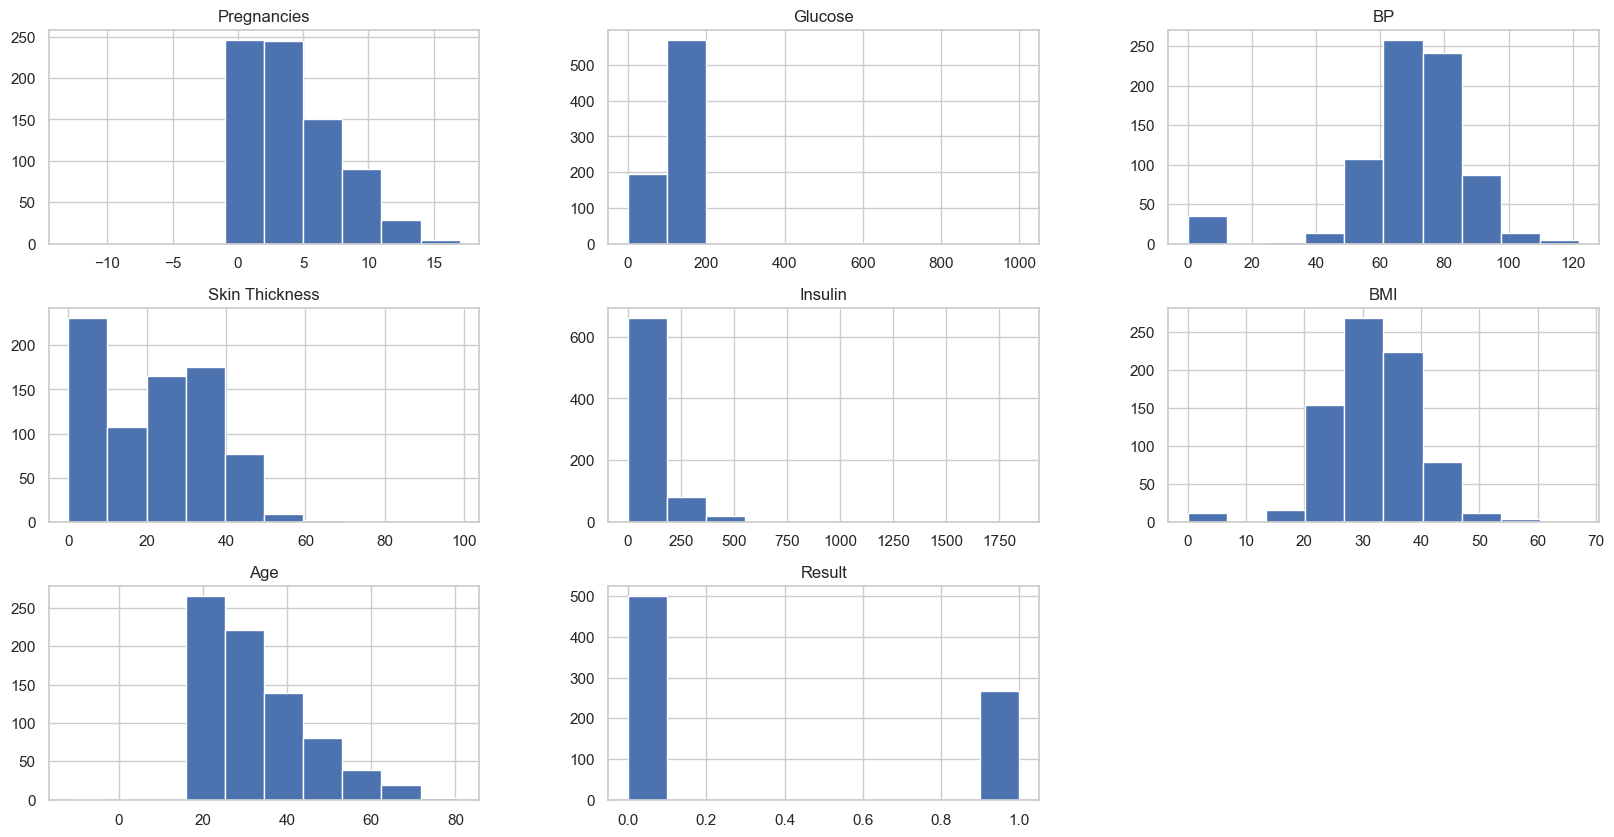

In [100]:
#visualizing distribution with histogram
df.hist(figsize = (20,10))
plt.show()

👆Observations:

Glucose, BP, Skin Thickness and BMI are uniformly distributed, means imputing zero and null values with median would be fine.


In [101]:
# Correcting negative values in general ('Pregnancies' and 'Age' columns cannot have negative values so replacing it with median values)
predictor_columns = df.drop(['Result'],axis=1).columns
for column in predictor_columns:
    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: median_value if x < 0 else x)

#verifying the minimum values for these columns to confirm correction
min_values_after_correction = df[predictor_columns].min()
min_values_after_correction

Pregnancies        0.0
Glucose            0.0
BP                 0.0
Skin Thickness     0.0
Insulin            0.0
BMI                0.0
Age               21.0
dtype: float64

👆Minimum values are good now.


In [102]:
#checking count of zeros (0s) in each column.
df.eq(0).sum()

Pregnancies       111
Glucose             5
BP                 35
Skin Thickness    227
Insulin           372
BMI                11
Age                 0
Result            500
dtype: int64

👆Insulin Column has values as 0 for over 372 rows which is not a great thing, so better to drop those rows.


In [103]:
df.drop(df[df['Insulin'] == 0].index, inplace=True)


In [104]:
#checking the revised count of zeros
df.eq(0).sum()

Pregnancies        57
Glucose             1
BP                  0
Skin Thickness      2
Insulin             0
BMI                 1
Age                 0
Result            266
dtype: int64

Observation: Numbers drastically dropped by dropping only Insulin column, but we still have few columns like Glucose, Skin Thickness and BMI which can be imputed with median for which we will check the distribution first


In [105]:
# Correcting zero values in general (Except 'Pregnancies' and 'Result' columns, other columns cannot be 0, so replacing it with median values)
predictor_columns_ = df.drop(['Pregnancies','Result'],axis=1).columns
for column in predictor_columns_:
    median_value = df[column].median()
    df[column] = df[column].apply(lambda x: median_value if x == 0 else x)

#verifying the minimum values for these columns to confirm correction
min_values_after_correction = df[predictor_columns_].min()
min_values_after_correction

Glucose           56.0
BP                24.0
Skin Thickness     7.0
Insulin           14.0
BMI               18.2
Age               21.0
dtype: float64

In [106]:
df.shape

(396, 8)

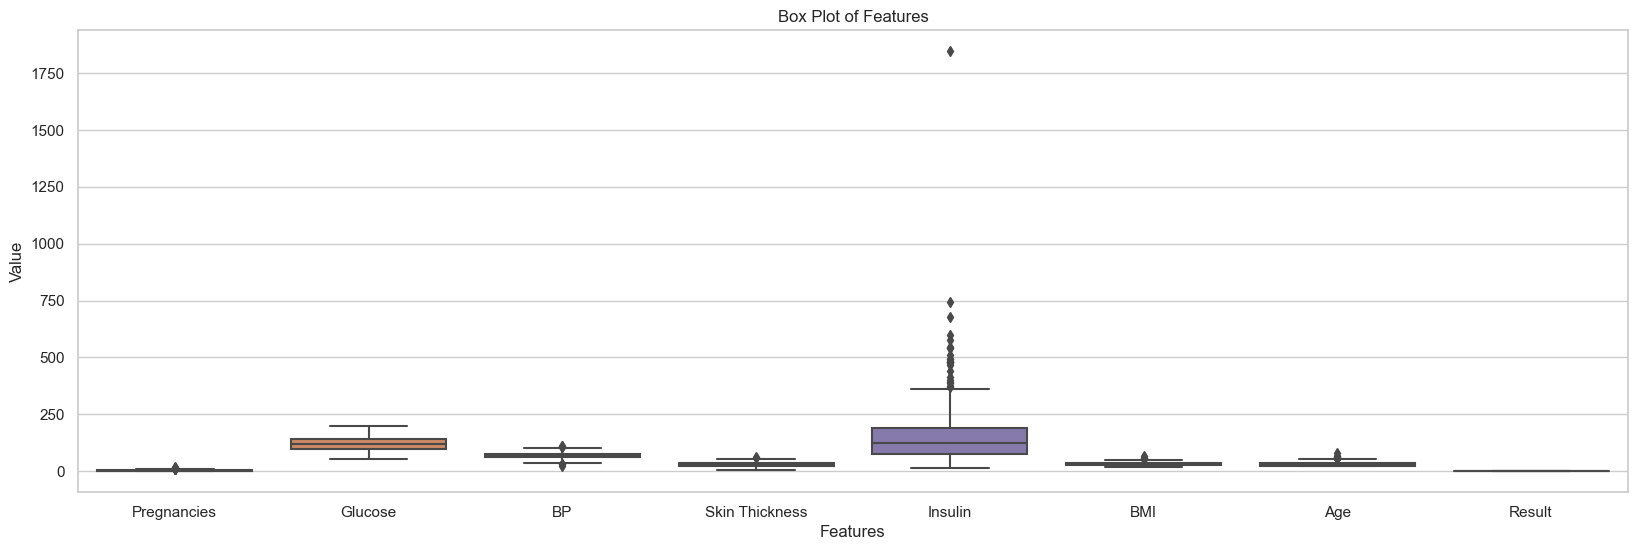

In [107]:
#checking outliers with box plot

sns.set(style="whitegrid")

# Create the box plot using Seaborn
plt.figure(figsize=(20, 6))
sns.boxplot(data=df)
plt.title("Box Plot of Features")
plt.xlabel("Features")
plt.ylabel("Value")
plt.show()

In [108]:
# Calculating the IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

# Creating a mask to identify extreme high outliers
outliers_mask = (df > (Q3 + threshold * IQR))

# Removing outliers by filtering the DataFrame
df = df[~outliers_mask]

In [109]:
#we can see there is no significant outliers in the data
df.describe()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,BMI,Age,Result
count,384.000000,396.000000,390.000000,393.000000,368.000000,387.000000,380.000000,396.000000
mean,3.007812,122.626263,70.292308,28.910941,132.334239,32.700775,29.842105,0.328283
std,2.760679,30.741416,11.946612,10.239963,74.355870,6.337599,8.662619,0.470182
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,75.000000,28.350000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,119.500000,33.100000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.000000,176.500000,36.800000,34.000000,1.000000
max,11.000000,198.000000,102.000000,56.000000,360.000000,49.700000,55.000000,1.000000


In [110]:
# Handling Missing or NULL Values with median
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

In [111]:
#verifying there are no NULL values now
df.isnull().sum()

Pregnancies       0
Glucose           0
BP                0
Skin Thickness    0
Insulin           0
BMI               0
Age               0
Result            0
dtype: int64

In [112]:
df.eq(0).sum()

Pregnancies        57
Glucose             0
BP                  0
Skin Thickness      0
Insulin             0
BMI                 0
Age                 0
Result            266
dtype: int64

👆There is no data with 0 as the value


In [113]:
df.describe()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,BMI,Age,Result
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,2.977273,122.626263,70.287879,28.911616,131.426768,32.709848,29.727273,0.328283
std,2.723919,30.741416,11.855585,10.201006,71.747692,6.265265,8.503841,0.470182
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,119.500000,33.100000,27.000000,0.000000
75%,4.000000,143.000000,78.000000,36.000000,170.250000,36.625000,34.000000,1.000000
max,11.000000,198.000000,102.000000,56.000000,360.000000,49.700000,55.000000,1.000000


👆Data Quality is good now


In [114]:
#checking correlation between all the columns
df.corr()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,BMI,Age,Result
Pregnancies,1.000000,0.205001,0.158090,0.098508,0.133909,-0.008932,0.620955,0.223278
Glucose,0.205001,1.000000,0.210659,0.198539,0.500823,0.204653,0.296556,0.513821
BP,0.158090,0.210659,1.000000,0.213270,0.137487,0.266053,0.272558,0.171027
Skin Thickness,0.098508,0.198539,0.213270,1.000000,0.198559,0.640669,0.177861,0.259951
Insulin,0.133909,0.500823,0.137487,0.198559,1.000000,0.274134,0.152752,0.315983
BMI,-0.008932,0.204653,0.266053,0.640669,0.274134,1.000000,0.164787,0.261104
Age,0.620955,0.296556,0.272558,0.177861,0.152752,0.164787,1.000000,0.373859
Result,0.223278,0.513821,0.171027,0.259951,0.315983,0.261104,0.373859,1.000000


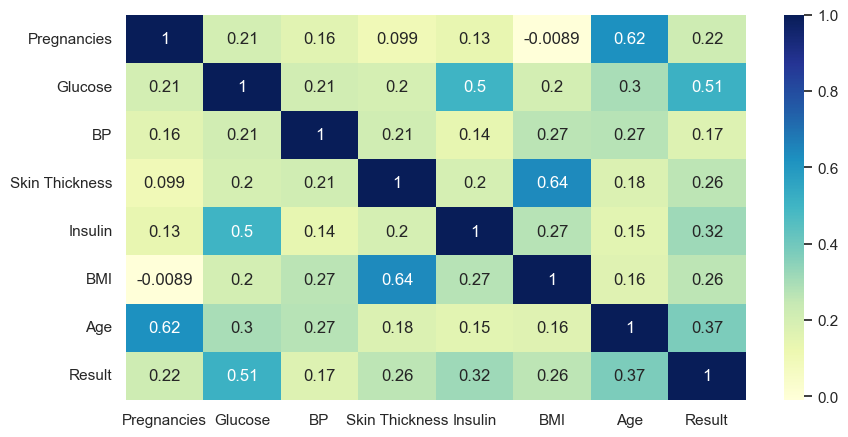

In [115]:
#visualizing the correlation for an ease of readability
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.show()

👆Observations:

Light Blue numbers are correalted

For ex:

1. Pregancies and Age are Correlated (With Age, chances of Pregnancy increases)

2. Glucose and Result (More Glucose Level, Chances of being Diabetic is more)

3. Skin Thickness Increases so as the BMI


<Figure size 1000x500 with 0 Axes>

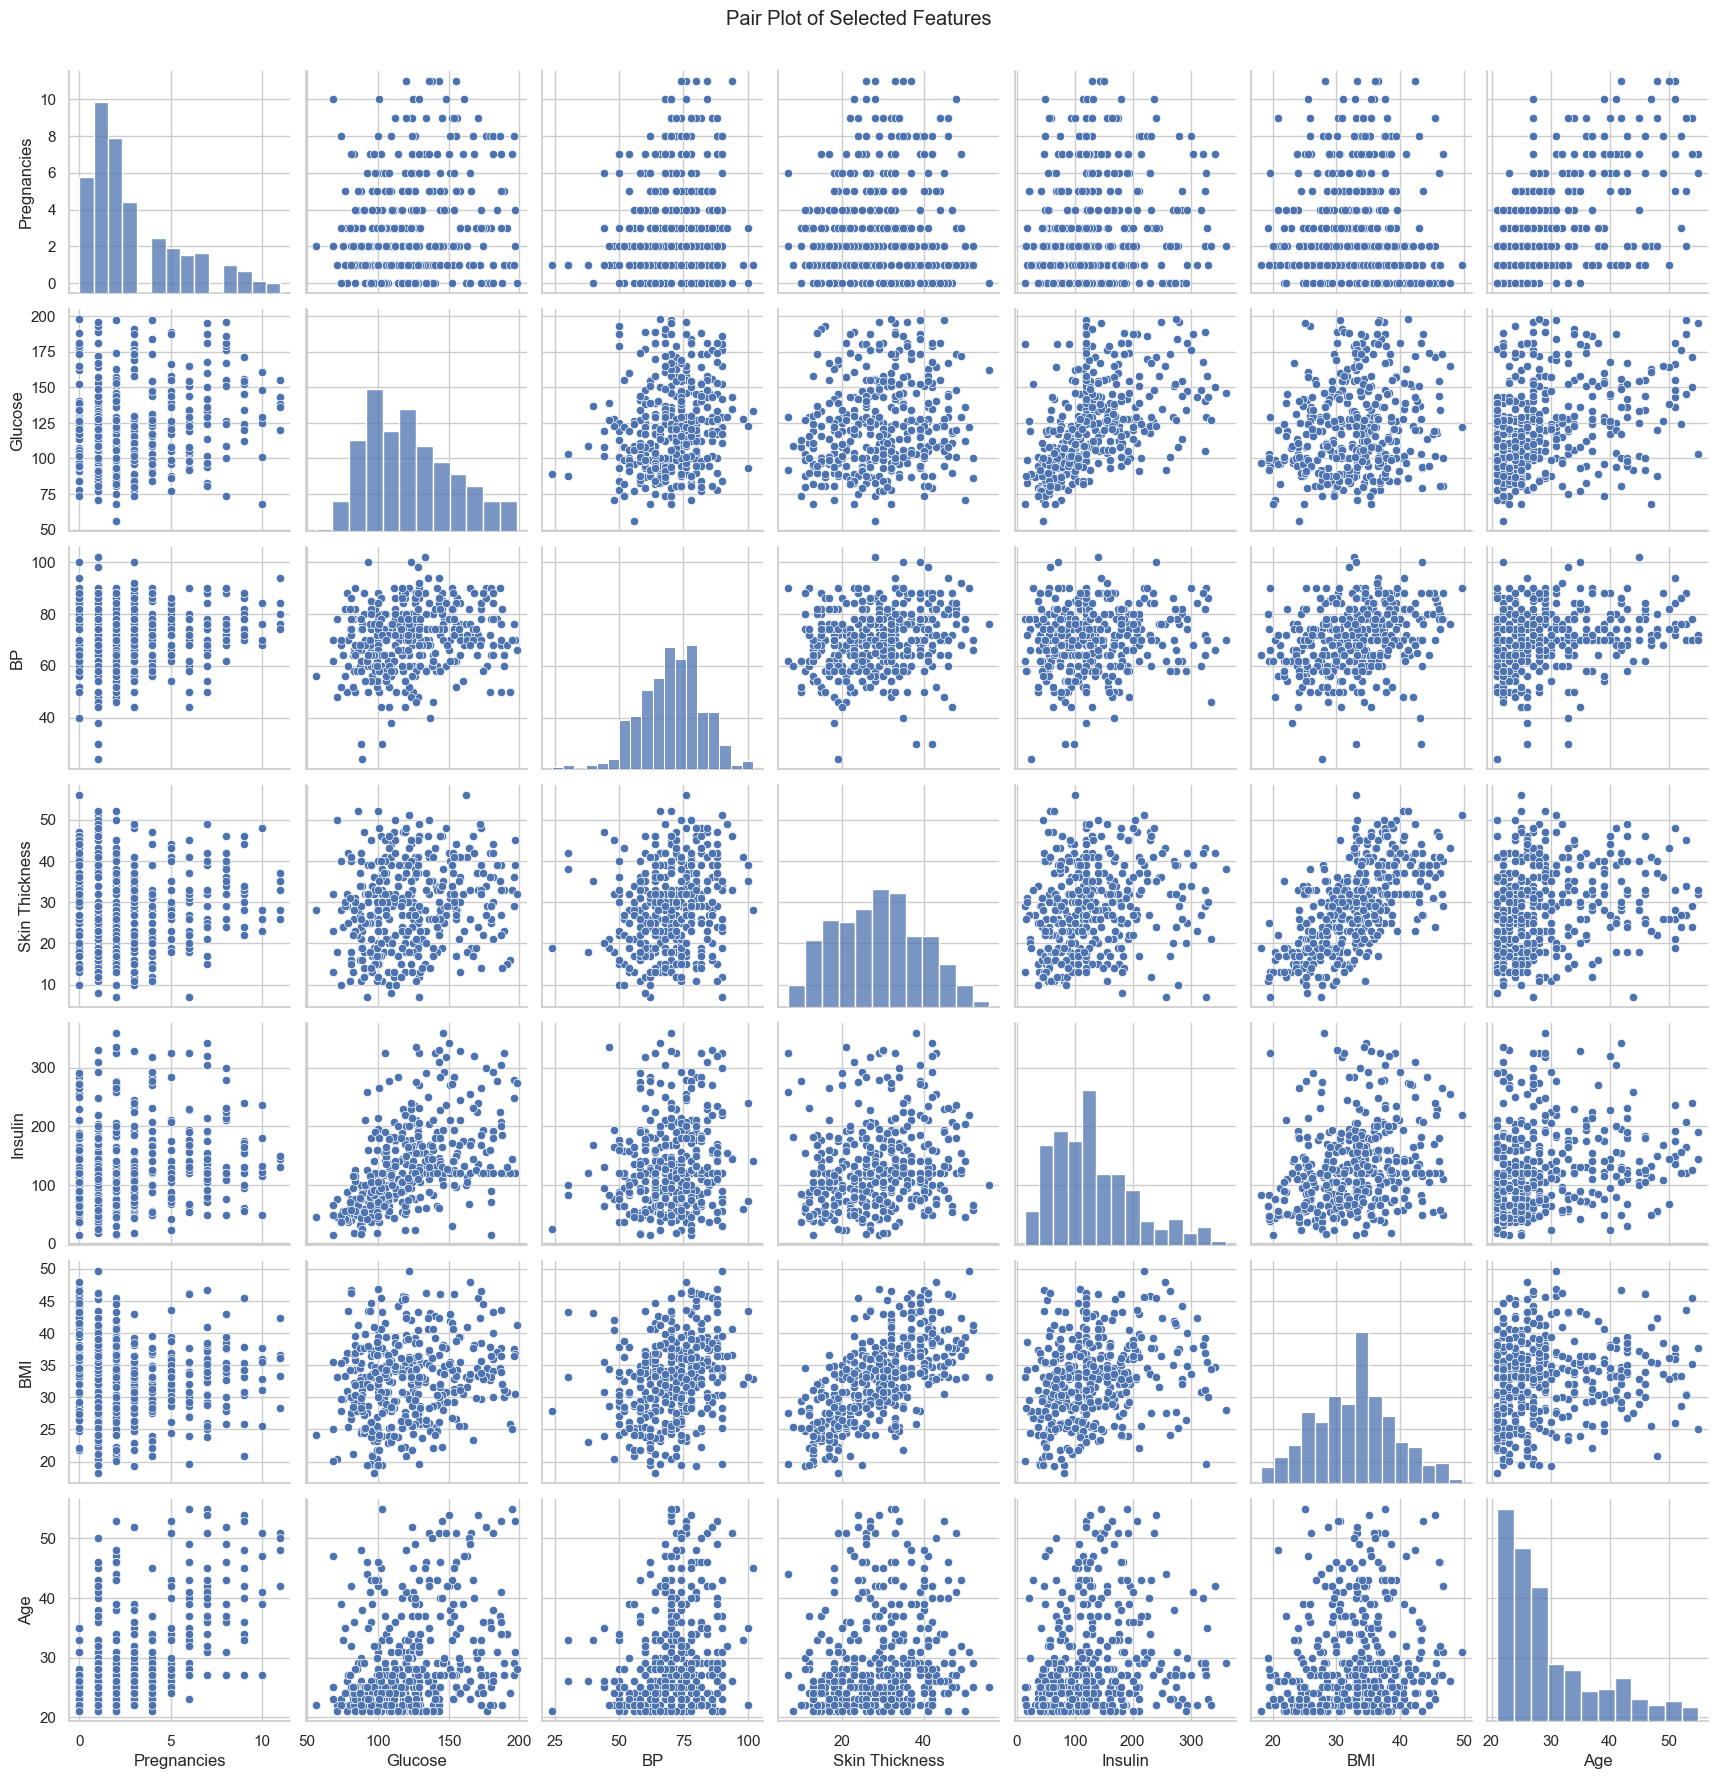

In [116]:
#visualizing data with pairplot to find patterns
plt.figure(figsize=(10, 5))
sns.pairplot(df.drop(['Result'],axis=1), kind='scatter', diag_kind='hist', palette='Set2')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

👆Observations:

1. The scatter plot for "Glucose on y-axis" vs. "BP on x-axis" shows a spread of dots without a clear pattern, suggesting no strong relationship. (similarly others can be observed)

2. The diagonal histogram for "BP" shows most people have values in the middle range, with fewer people having very low or very high values.


In [117]:
#count of the result
df['Result'].value_counts()

0    266
1    130
Name: Result, dtype: int64

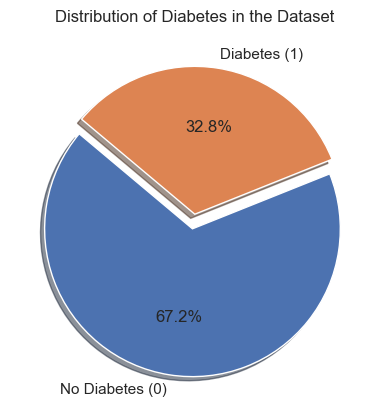

In [118]:
# Pie chart for the distribution of 'Yes' and 'No' in the target variable or Result
class_counts = df['Result'].value_counts()
labels = ['No Diabetes (0)', 'Diabetes (1)']

explode = (0.1, 0)

plt.figure()
plt.pie(class_counts, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Distribution of Diabetes in the Dataset')
plt.show()

# TRAINING THE MODEL


In [119]:
from sklearn.model_selection import train_test_split

X = df.drop(['Result'],axis=1)
y = df['Result']

In [120]:
# #Normalizing the data
# from sklearn.preprocessing import StandardScaler

# sc= StandardScaler()
# X= sc.fit_transform(X)

In [121]:
#splitting (80%)train and (20%)test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
X_train.shape, y_train.shape

((316, 7), (316,))

In [123]:
X_test.shape, y_test.shape

((80, 7), (80,))

In [124]:
#using logistic regression algorithm to train the model and check the accuracy
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the Model


In [125]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[47  5]
 [ 6 22]]


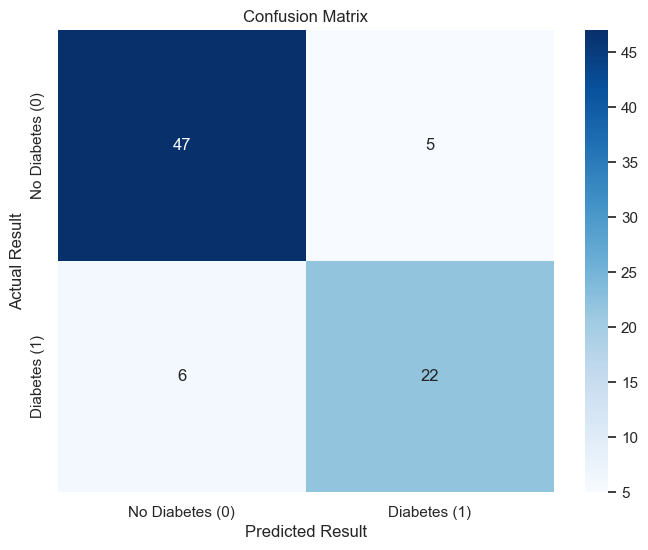

In [126]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=['No Diabetes (0)', 'Diabetes (1)'],
            yticklabels=['No Diabetes (0)', 'Diabetes (1)'])
plt.xlabel('Predicted Result')
plt.ylabel('Actual Result')
plt.title('Confusion Matrix')
plt.show()

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score


print("F1 score:",round((f1_score(y_test,y_pred)),2))
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print("Precision:",round((precision_score(y_test, y_pred)*100),2))
print("Recall:",recall_score(y_test, y_pred)*100)

F1 score: 0.8
Accuracy: 86.25
Precision: 81.48
Recall: 78.57142857142857


Conclusion:

Our Model has overall good scores, in predicting and classifying similar data with 85% confidence and accuracy.

The model can be improved further by checking other algorithms and comparing performances.


In [128]:
import pickle
# Save the trained model as a .pkl file
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [131]:

import numpy as np
input_data = (1,	89,	66,	23,	94,	28.10,	21
)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic
